# Real Estate-price predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0,0.538,NaN,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,NaN,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       500 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

In [6]:
housing['RAD']

0      1
1      2
2      2
3      3
4      3
      ..
501    1
502    1
503    1
504    1
505    1
Name: RAD, Length: 506, dtype: int64

In [7]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [8]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,500.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286398,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705979,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884750,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629250,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt

array([[<AxesSubplot: title={'center': 'CRIM'}>,
        <AxesSubplot: title={'center': 'ZN'}>,
        <AxesSubplot: title={'center': 'INDUS'}>,
        <AxesSubplot: title={'center': 'CHAS'}>],
       [<AxesSubplot: title={'center': 'NOX'}>,
        <AxesSubplot: title={'center': 'RM'}>,
        <AxesSubplot: title={'center': 'AGE'}>,
        <AxesSubplot: title={'center': 'DIS'}>],
       [<AxesSubplot: title={'center': 'RAD'}>,
        <AxesSubplot: title={'center': 'TAX'}>,
        <AxesSubplot: title={'center': 'PTRATIO'}>,
        <AxesSubplot: title={'center': 'B'}>],
       [<AxesSubplot: title={'center': 'LSTAT'}>,
        <AxesSubplot: title={'center': 'medv'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

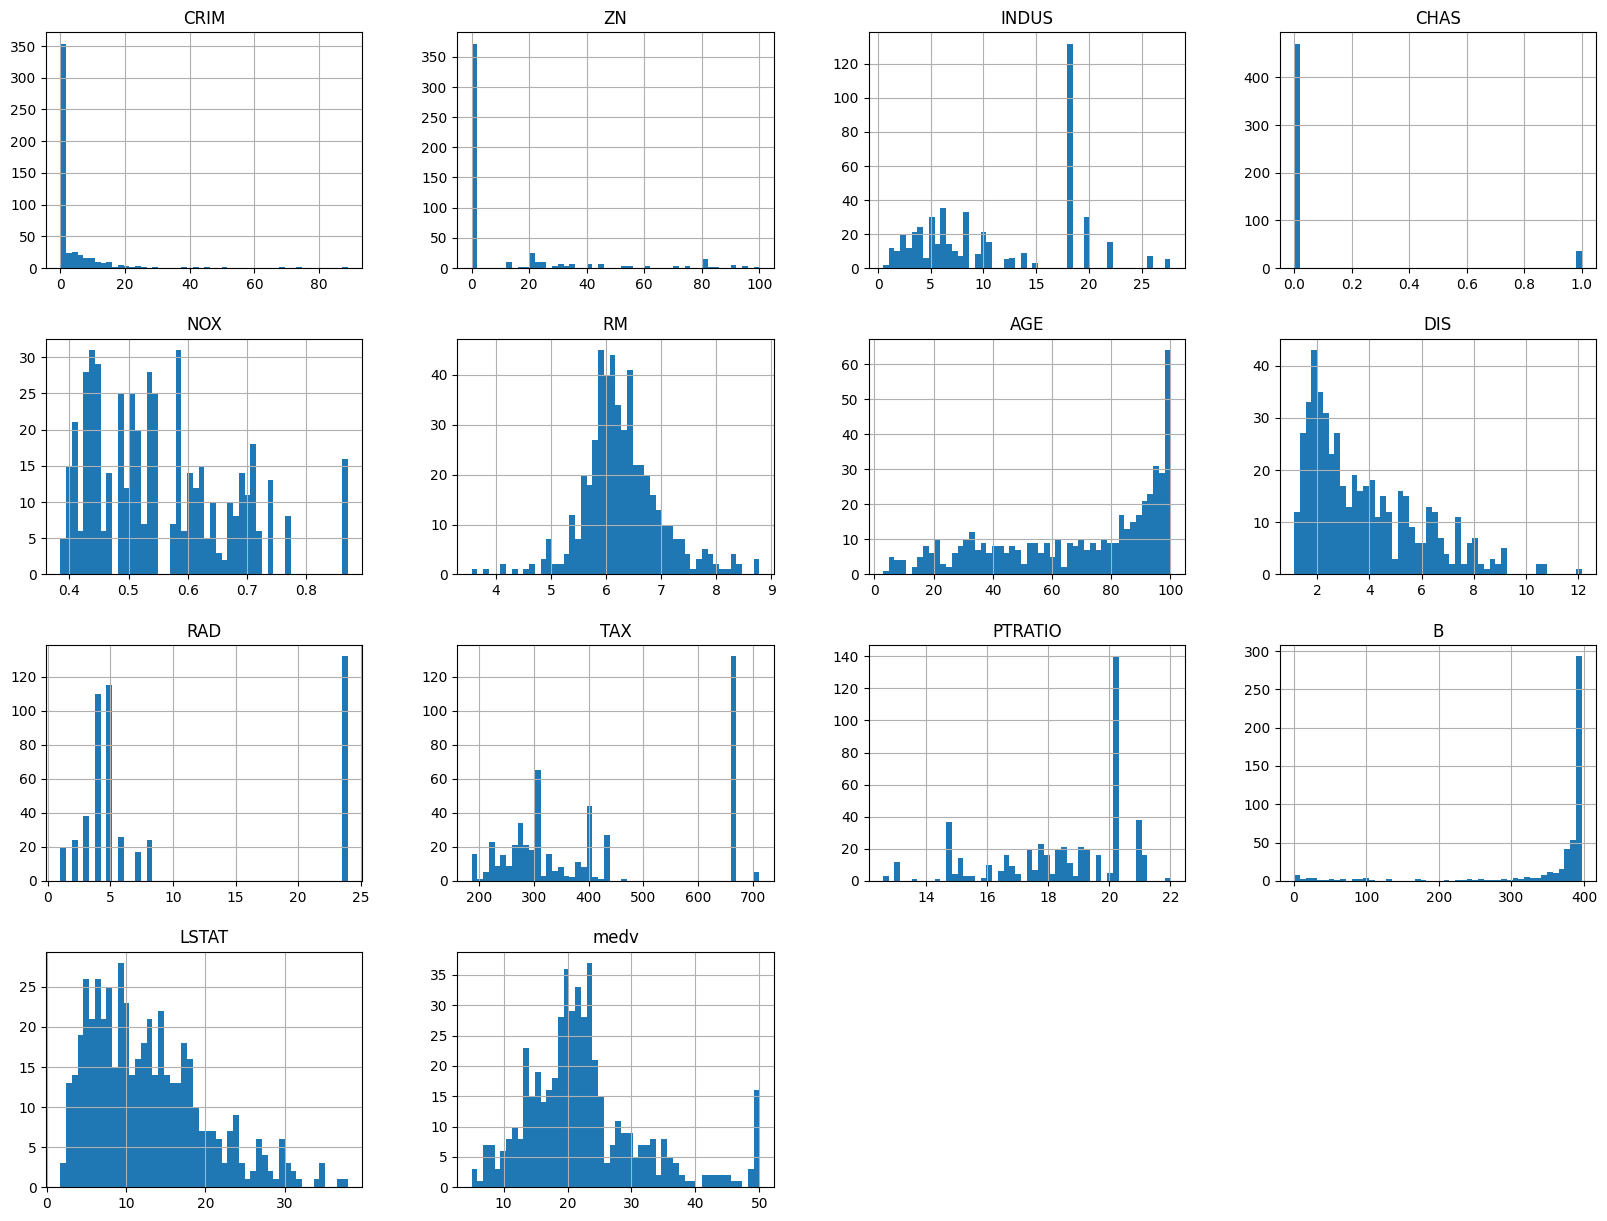

In [11]:
housing.hist(bins=50,figsize=(20,15))

## Training-testing split

In [12]:
import numpy as np
np.random.seed(42)
def split_train_test(data,test_ratio):
    shuffled=np.random.permutation(len(data))
    
    print(shuffled) 
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [13]:
#train_set,test_set=split_train_test(housing ,0.2)

In [14]:
#print(f"rows in train_set:{len(train_set)}\n rows in test set:{len(test_set)}\n")

In [15]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing ,test_size=0.2,random_state=42)
print(f"rows in train_set:{len(train_set)}\n rows in test set:{len(test_set)}\n")

rows in train_set:404
 rows in test set:102



In [16]:
#stratified splitting is given below

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [18]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [19]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [20]:
95/7

13.571428571428571

In [21]:
376/28

13.428571428571429

In [22]:
housing=strat_train_set.copy()

# LOOKING FOR CORELATIONS

In [23]:
corr_matrix = housing.corr()
corr_matrix['medv'].sort_values(ascending=False)

medv       1.000000
RM         0.680693
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: medv, dtype: float64

array([[<AxesSubplot: xlabel='CHAS', ylabel='CHAS'>,
        <AxesSubplot: xlabel='medv', ylabel='CHAS'>,
        <AxesSubplot: xlabel='ZN', ylabel='CHAS'>,
        <AxesSubplot: xlabel='RM', ylabel='CHAS'>],
       [<AxesSubplot: xlabel='CHAS', ylabel='medv'>,
        <AxesSubplot: xlabel='medv', ylabel='medv'>,
        <AxesSubplot: xlabel='ZN', ylabel='medv'>,
        <AxesSubplot: xlabel='RM', ylabel='medv'>],
       [<AxesSubplot: xlabel='CHAS', ylabel='ZN'>,
        <AxesSubplot: xlabel='medv', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='RM', ylabel='ZN'>],
       [<AxesSubplot: xlabel='CHAS', ylabel='RM'>,
        <AxesSubplot: xlabel='medv', ylabel='RM'>,
        <AxesSubplot: xlabel='ZN', ylabel='RM'>,
        <AxesSubplot: xlabel='RM', ylabel='RM'>]], dtype=object)

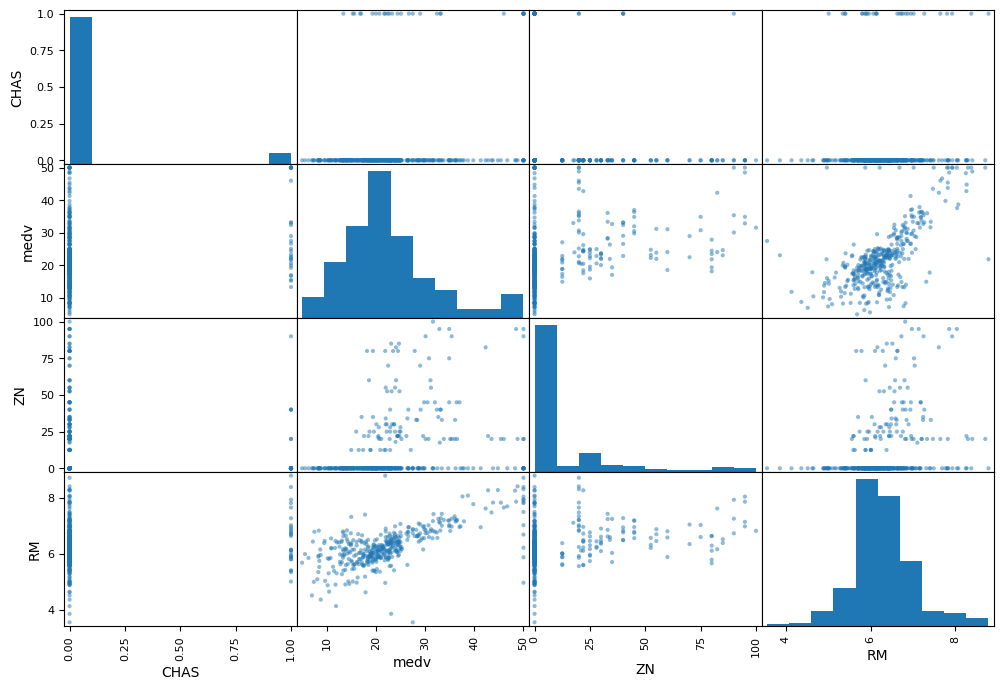

In [24]:
from pandas.plotting import scatter_matrix
attributes=["CHAS","medv","ZN","RM"]
scatter_matrix(housing[attributes],figsize=(12,8))

<AxesSubplot: xlabel='RM', ylabel='medv'>

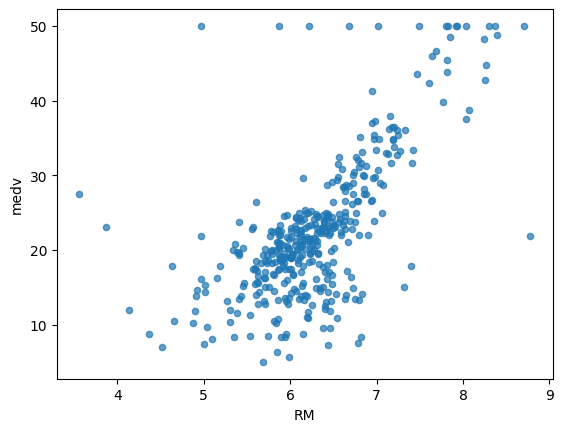

In [25]:
housing .plot(kind="scatter",x="RM",y="medv",alpha=0.7)

# Trying new attributes through combinations


In [26]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0


In [27]:
housing["taxrm"]=housing['TAX']/housing['RM']

In [28]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv,taxrm
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [29]:
corr_matrix = housing.corr()
corr_matrix['medv'].sort_values(ascending=False)

medv       1.000000
RM         0.680693
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
taxrm     -0.525780
LSTAT     -0.740494
Name: medv, dtype: float64

In [30]:
housing=strat_train_set.drop("medv",axis=1)
housing_labels=strat_train_set["medv"].copy()

# Managing the missing attributes

In [31]:
#1).Remove the full data set in the following row
#2).remove the full attribute/column.
#3).replace the missing data with median,mean,0

In [32]:
a=housing.dropna(subset=["RM"]) #opy\tion 1
a.shape

(399, 13)

In [33]:
housing.drop("RM",axis=1).shape#option 2

(404, 12)

In [34]:
median=housing["RM"].median()

In [35]:
housing["RM"].fillna(median)#option 3

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [36]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


In [37]:
housing.shape

(404, 13)

# SCIKIT LEARN DESIGN

CReating pipeline

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()),
])

In [39]:
housing_num=my_pipeline.fit_transform(housing)

In [40]:
housing_num

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])


# Selecting desired model

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
#model=DecisionTreeRegressor()
#model=LinearRegression()
model.fit(housing_num,housing_labels)

RandomForestRegressor()

In [42]:
some_data=housing.iloc[:5]

In [43]:
some_labels=housing_labels.iloc[:5]

In [44]:
prepared_data=my_pipeline.transform(some_data)

In [45]:
model.predict(prepared_data)

array([22.423, 25.046, 16.655, 23.391, 23.521])

In [46]:
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: medv, dtype: float64

# EVALUATING MODEL

In [47]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)


In [48]:
lin_mse

1.7433586039603954


# using better evaluation technique -cross validation

In [49]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num,housing_labels,scoring="neg_mean_squared_error")
rmse_scores=np.sqrt(-scores)

In [50]:
rmse_scores

array([2.77383154, 3.59915994, 3.19258337, 4.21616831, 3.18751014])

In [51]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation",scores.std())

In [52]:
print_scores(rmse_scores)

Scores: [2.77383154 3.59915994 3.19258337 4.21616831 3.18751014]
Mean: 3.3938506594428275
Standard deviation 0.48700448689668663


# SAVING THE MODEL

In [53]:
from joblib import dump,load
dump(model,'FINAL.joblib')

['FINAL.joblib']

# TESTING THE MODEL

In [54]:
X_test=strat_test_set.drop("medv",axis=1)
Y_test=strat_test_set["medv"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)

In [56]:
final_rmse

2.96538746104411

In [57]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24408459, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])